<a href="https://colab.research.google.com/github/danmaher067/Data_Glacier_-intership/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install modin

     |████████████████████████████████| 583kB 5.9MB/s 
     |████████████████████████████████| 9.9MB 27.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.3 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [4]:
pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 112kB 4.4MB/s 


In [5]:
pip install modin[all]

     |████████████████████████████████| 71kB 3.3MB/s 
     |████████████████████████████████| 645kB 8.0MB/s 
     |████████████████████████████████| 17.2MB 254kB/s 
     |████████████████████████████████| 48.5MB 85kB/s 
     |████████████████████████████████| 133kB 57.0MB/s 
     |████████████████████████████████| 1.8MB 36.8MB/s 
     |████████████████████████████████| 122kB 58.7MB/s 
     |████████████████████████████████| 3.1MB 45.5MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 133kB 38.9MB/s 
     |████████████████████████████████| 1.3MB 38.4MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 204kB 47.5MB/s 
     |████████████████████████████████| 4.1MB 43.7MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 9.5MB 40.2MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |

In [1]:
import pandas as pd
import modin.pandas as mpd
import dask.dataframe as dd
import time

In [2]:
def readPandas(file):
  start = time.time()
  dfp = df_pd=pd.read_csv(file)
  end = time.time()
  pandastimetaken = end-start
  print(f"Modin Appending Time :{pandastimetaken}")
  return pandastimetaken

In [3]:

def readModin(file):
  start = time.time()
  mpd.read_csv(file)
  end = time.time()
  modintimetaken = end-start
  print(f"Modin Appending Time :{modintimetaken}")
  return modintimetaken

In [4]:
def readDask(file):
  start = time.time()
  dd.read_csv(file)
  end = time.time()
  dasktimetaken = end-start
  print(f"Modin Appending Time :{dasktimetaken}")
  return dasktimetaken

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Modin Appending Time :0.2978808879852295


To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()



Modin Appending Time :4.372511625289917
Modin Appending Time :0.01567387580871582


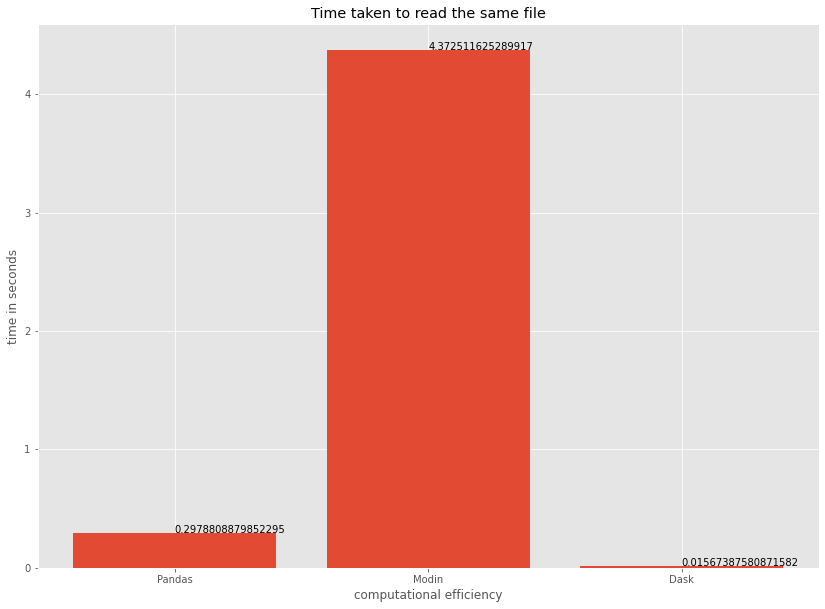

In [6]:
# Plots styles.
plt.style.use('ggplot')
filename = 'Final_Cab_Data_Combined.csv'
# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)
y = readPandas(filename),readModin(filename),readDask(filename)
x = np.array(["Pandas", "Modin", "Dask"])
for i in range(len(x)):
        plt.text(i,y[i],y[i])
plt.bar(x,y)
plt.ylabel('time in seconds')
plt.title("Time taken to read the same file")
plt.xlabel("computational efficiency")
plt.show()

The above figure shows the speed of reading a large file.<br>


*   It can be seen that the Dask is exponetaily faster than Pandas.


Do some validation<br>
Here's how its done:<br>
  Step 1: install pandas_schema<br>
  For this we can simply do pip install pandas_schema<br>
  Step 2: define some simple type checking methods<br>
  We will read a csv file. For a simple demonstration we will just consider simple validation rules, such as checking if a type is null, integer or decimal, but using pandas_schema we can do also more complex stuff

In [7]:
pip install pandas_schema

In [22]:
import pandas as pd
from io import StringIO
from pandas_schema import Column, Schema
from pandas_schema.validation import LeadingWhitespaceValidation, TrailingWhitespaceValidation, CanConvertValidation, MatchesPatternValidation, InRangeValidation, InListValidation

In [51]:
schema = Schema([
    Column('Transaction ID', [MatchesPatternValidation(r'\d{10}')]),
    Column('Date of Travel', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Company', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    #Column('Age', [InRangeValidation(0, 120)]),
    Column('CITY', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('KM Travelled', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Price Charged',[LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Cost of Trip', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Customer ID', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Payment_Mode', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Gender', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Age', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Income (USD/Month)', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Population', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    Column('Users', [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    #Column('Sex', [InListValidation(['Male', 'Female', 'Other'])]),
    #Column('Customer ID', [MatchesPatternValidation(r'\d{4}[A-Z]{4}')])
])

In [54]:
    errors = schema.validate(df)
    for error in errors:
      print(error)

KeyboardInterrupt: ignored

In [8]:
def read_file(file):
    df = pd.read_csv(file)
    if(df.empty):
      print('CSV file is empty')
    else:
      print('CSV file is not empty')
    return df

In [9]:
read_file('Final_Cab_Data_Combined.csv')

CSV file is not empty


,Transaction ID,Date of Travel,Company,CITY,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290.0,Card,Male,28.0,10813.0,"814,885",24701.0
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703.0,Card,Male,27.0,9237.0,"814,885",24701.0
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712.0,Cash,Male,53.0,11242.0,"814,885",24701.0
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020.0,Cash,Male,23.0,23327.0,"814,885",24701.0
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182.0,Card,Male,33.0,8536.0,"814,885",24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167087,10206256,13/08/2017,Pink Cab,SEATTLE WA,39.27,626.63,435.897,36512.0,Card,Male,27.0,8266.0,"671,238",25063.0
167088,10206257,06/08/2017,Pink Cab,SEATTLE WA,10.60,169.21,117.660,37777.0,Card,Female,62.0,19882.0,"671,238",25063.0
167089,10206258,12/08/2017,Pink Cab,SEATTLE WA,9.12,127.16,97.584,38332.0,Card,Male,45.0,19188.0,"671,238",25063.0
167090,10206259,11/08/2017,Pink Cab,SEATTLE WA,16.64,268.10,194.688,37538.0,Cash,Male,59.0,29262.0,"671,238",25063.0


# New Section

In [10]:
df = pd.read_csv('Final_Cab_Data_Combined.csv')

In [11]:
for dtype in df.dtypes.iteritems():
    print(dtype)

('Transaction ID', dtype('int64'))
('Date of Travel', dtype('O'))
('Company', dtype('O'))
('CITY', dtype('O'))
('KM Travelled', dtype('float64'))
('Price Charged', dtype('float64'))
('Cost of Trip', dtype('float64'))
('Customer ID', dtype('int64'))
('Payment_Mode', dtype('O'))
('Gender', dtype('O'))
('Age', dtype('int64'))
('Income (USD/Month)', dtype('int64'))
('Population', dtype('O'))
('Users', dtype('float64'))


In [12]:
print(df.dtypes)

Transaction ID          int64
Date of Travel         object
Company                object
CITY                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                 float64
dtype: object


In [ ]:
for dtype in df.dtypes.iteritems():
    print(dtype)

In [ ]:
df.dropna(how="all")

In [13]:
# remove special charachers
def remSpecial(dataframe):
  # Python code to remove special char
  # using replace() 
   
  # initializing special characters 
  sp_chars = [';', ':', '!', "*"," "] 
   
  # using replace() to  
  # remove special chars  
  for i in sp_chars : 
      dataframe = dataframe.replace(i, '')
   
  # printing resultant string  
  print ("After Remove special char ")

In [14]:
remSpecial(df)

After Remove special char 


In [18]:
pip install pyaml

In [19]:
from pyaml import yaml

In [20]:
#load the csv as df


,Transaction ID,Date of Travel,Company,CITY,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885",24701.0
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885",24701.0
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885",24701.0
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885",24701.0
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885",24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176913,10218032,31/08/2017,Yellow Cab,WASHINGTON DC,20.58,289.87,246.9600,53197,Card,Male,44,6004,"418,859",127001.0
176914,10218033,03/09/2017,Yellow Cab,WASHINGTON DC,28.75,393.03,379.5000,51959,Card,Female,54,17743,"418,859",127001.0
176915,10218034,02/09/2017,Yellow Cab,WASHINGTON DC,32.13,421.49,400.9824,51792,Card,Male,19,17027,"418,859",127001.0
176916,10218035,31/08/2017,Yellow Cab,WASHINGTON DC,35.52,495.40,498.7008,52924,Cash,Female,56,2139,"418,859",127001.0
